In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, classification_report
)

In [23]:
file_path = "multilingual_mobile_app_reviews_2025.csv"
df = pd.read_csv(file_path)

print("Original dataset shape:", df.shape)
print(df.head())

Original dataset shape: (2514, 15)
   review_id  user_id      app_name    app_category  \
0          1  1967825     MX Player  Travel & Local   
1          2  9242600        Tinder      Navigation   
2          3  7636477       Netflix          Dating   
3          4   209031         Venmo    Productivity   
4          5  7190293  Google Drive       Education   

                                         review_text review_language  rating  \
0  Qui doloribus consequuntur. Perspiciatis tempo...              no     1.3   
1  Great app but too many ads, consider premium v...              ru     1.6   
2  The interface could be better but overall good...              es     3.6   
3  Latest update broke some features, please fix ...              vi     3.8   
4  Perfect for daily use, highly recommend to eve...              tl     3.2   

           review_date  verified_purchase     device_type  num_helpful_votes  \
0  2024-10-09 19:26:40               True  Android Tablet                

In [ ]:
df_clean = df.dropna(subset=["review_text", "rating"]).copy()


df_clean["label"] = np.where(df_clean["rating"] >= 3.5, 1, 0)

print("After cleaning shape:", df_clean.shape)
print(df_clean["label"].value_counts())


After cleaning shape: (2418, 16)
label
0    1482
1     936
Name: count, dtype: int64


In [28]:
X = df_clean["review_text"]
y = df_clean["label"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [25]:
vectorizer = TfidfVectorizer(stop_words="english", max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [26]:

model = LogisticRegression()
model.fit(X_train_tfidf, y_train)


y_pred = model.predict(X_test_tfidf)

In [ ]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)


In [ ]:
print(" Model Performance")
print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 Score:", f1)

print(" Confusion Matrix")
print(cm)

print(" Classification Report")
print(classification_report(y_test, y_pred, target_names=["Negative", "Positive"]))

 Model Performance
Accuracy: 0.6074380165289256
Precision: 0.38461538461538464
Recall: 0.026737967914438502
F1 Score: 0.05
 Confusion Matrix
[[289   8]
 [182   5]]
 Classification Report
              precision    recall  f1-score   support

    Negative       0.61      0.97      0.75       297
    Positive       0.38      0.03      0.05       187

    accuracy                           0.61       484
   macro avg       0.50      0.50      0.40       484
weighted avg       0.53      0.61      0.48       484



In [18]:
file_path = "multilingual_mobile_app_reviews_2025.csv"
df = pd.read_csv(file_path)

print("Before Imputation:")
print(df.isnull().sum())


df["review_text"] = df["review_text"].fillna("unknown")

df["rating"] = df["rating"].fillna(df["rating"].median())


for col in ["user_country", "user_gender", "app_version"]:
    df[col] = df[col].fillna(df[col].mode()[0])

print("After Imputation:")
print(df.isnull().sum())

Before Imputation:
review_id              0
user_id                0
app_name               0
app_category           0
review_text           59
review_language        0
rating                37
review_date            0
verified_purchase      0
device_type            0
num_helpful_votes      0
user_age               0
user_country          41
user_gender          587
app_version           30
dtype: int64
After Imputation:
review_id            0
user_id              0
app_name             0
app_category         0
review_text          0
review_language      0
rating               0
review_date          0
verified_purchase    0
device_type          0
num_helpful_votes    0
user_age             0
user_country         0
user_gender          0
app_version          0
dtype: int64


                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.610338    0.30000  0.015625  0.029703
1          Naive Bayes  0.594433    0.30000  0.046875  0.081081
2        Random Forest  0.610338    0.37500  0.031250  0.057692
3                  SVM  0.598410    0.34375  0.057292  0.098214


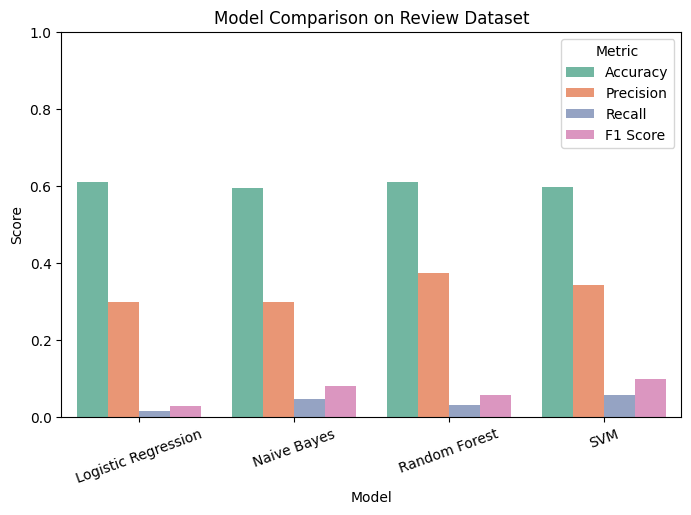

In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, classification_report
)
import matplotlib.pyplot as plt
import seaborn as sns


file_path = "multilingual_mobile_app_reviews_2025.csv"
df = pd.read_csv(file_path)

df["review_text"] = df["review_text"].fillna("unknown")
df["rating"] = df["rating"].fillna(df["rating"].median())
for col in ["user_country", "user_gender", "app_version"]:
    df[col] = df[col].fillna(df[col].mode()[0])


df["label"] = np.where(df["rating"] >= 3.5, 1, 0)


X = df["review_text"]
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


vectorizer = TfidfVectorizer(stop_words="english", max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "SVM": LinearSVC()
}

results = []

for name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append([name, acc, prec, rec, f1])


results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score"])
print(results_df)

plt.figure(figsize=(8,5))
sns.barplot(data=results_df.melt(id_vars="Model", var_name="Metric", value_name="Score"),
            x="Model", y="Score", hue="Metric", palette="Set2")
plt.title("Model Comparison on Review Dataset")
plt.xticks(rotation=20)
plt.ylim(0,1)
plt.show()

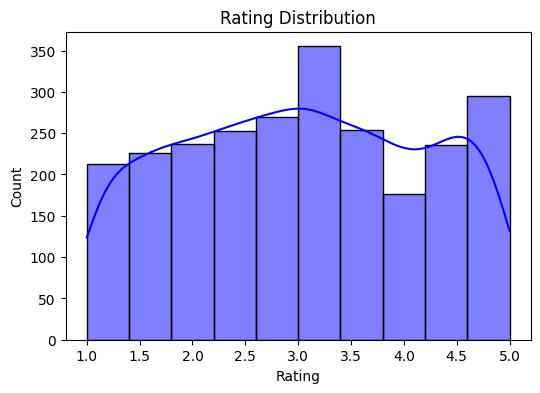

/tmp/ipython-input-1114005178.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["label"], palette="Set2")


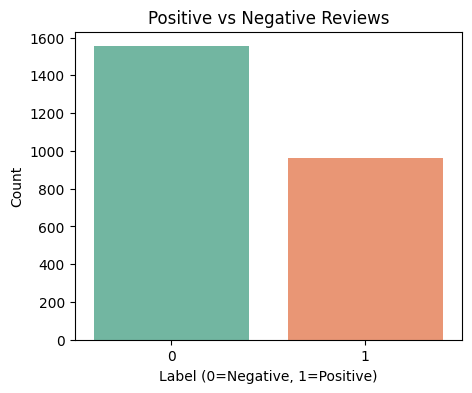

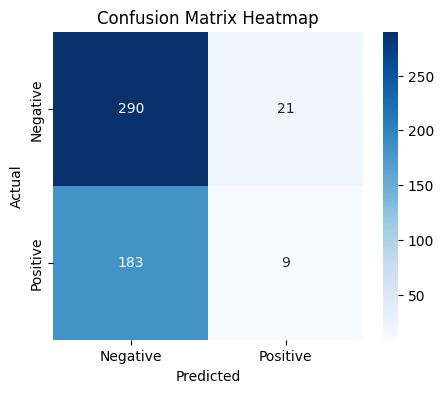

In [29]:
df["review_text"] = df["review_text"].fillna("unknown")
df["rating"] = df["rating"].fillna(df["rating"].median())
for col in ["user_country", "user_gender", "app_version"]:
    df[col] = df[col].fillna(df[col].mode()[0])

df["label"] = np.where(df["rating"] >= 3.5, 1, 0)


plt.figure(figsize=(6,4))
sns.histplot(df["rating"], bins=10, kde=True, color="blue")
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


plt.figure(figsize=(5,4))
sns.countplot(x=df["label"], palette="Set2")
plt.title("Positive vs Negative Reviews")
plt.xlabel("Label (0=Negative, 1=Positive)")
plt.ylabel("Count")
plt.show()


from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

X = df["review_text"]
y = df["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

vectorizer = TfidfVectorizer(stop_words="english", max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

model = MultinomialNB()
model.fit(X_train_tfidf, y_train)
y_pred = model.predict(X_test_tfidf)


cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative","Positive"], yticklabels=["Negative","Positive"])
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

